# **Clasificación de imágenes MNIST
En este Jupyter Notebook mostraremos cómo clasificar un dat-set de imágenes para su correcta clasificación. Nos encontramos ante un claro ejemplo de clasificación, para lo cual haremos uso de una red profunda convolucional que terminará en una capa de salida densa fully-connected del tamaño del número de etiquetas del que consta nuestro data-set.

##Importar Líbrerias

In [8]:
import os
#import time

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import load_model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

import warnings
warnings.filterwarnings('ignore')


Cargar el dataset MNIST

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preprocesando los datos

In [10]:
# Normalizar los valores de los píxeles entre 0 y 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Agregar una dimensión de canal a las imágenes
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convertir las etiquetas a one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

definicion del modelo

In [11]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

Compilo El Modelo

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Entrenar el Modelo

In [13]:
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 115ms/step - accuracy: 0.7590 - loss: 0.7726 - val_accuracy: 0.9770 - val_loss: 0.0823
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 117ms/step - accuracy: 0.9624 - loss: 0.1244 - val_accuracy: 0.9837 - val_loss: 0.0574
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 120ms/step - accuracy: 0.9739 - loss: 0.0882 - val_accuracy: 0.9850 - val_loss: 0.0512
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accuracy: 0.9777 - loss: 0.0700 - val_accuracy: 0.9892 - val_loss: 0.0411
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9804 - loss: 0.0627 - val_accuracy: 0.9895 - val_loss: 0.0380
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 122ms/step - accuracy: 0.9840 - loss: 0.0516 - val_accuracy: 0.9903 - val_loss: 0.0378
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 122ms/step - accuracy: 0.9837 - loss: 0.0498 - val_accuracy: 0.9893 - val_loss: 0.0383
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 119ms/step - accuracy: 0.9862 - loss: 0

Guardar Modelo


In [22]:
model.save('mnist_model.keras')

In [51]:
loaded_model = load_model('mnist_model.keras')

In [52]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

Mostrando predicciones de prueba

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


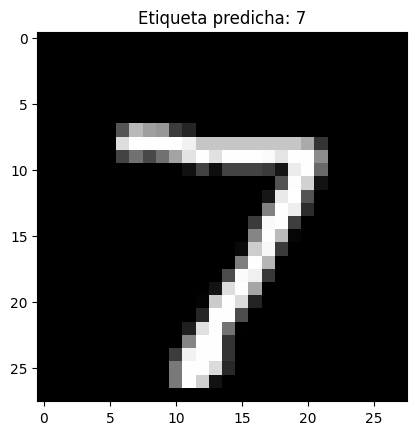

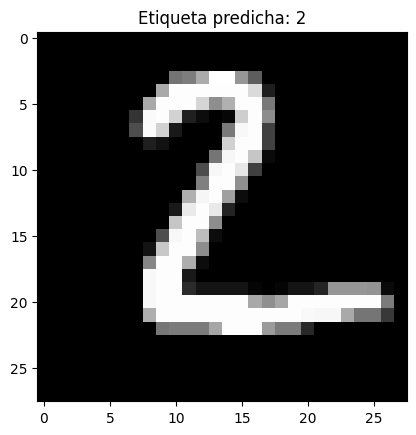

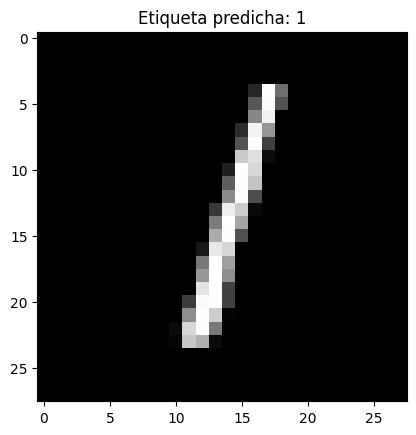

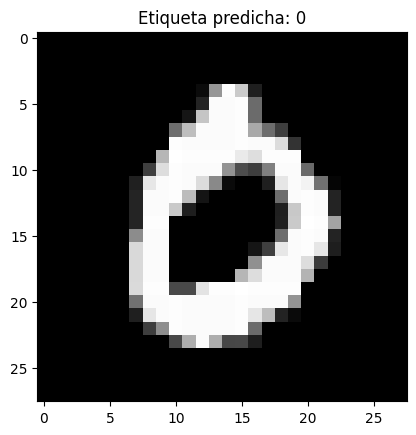

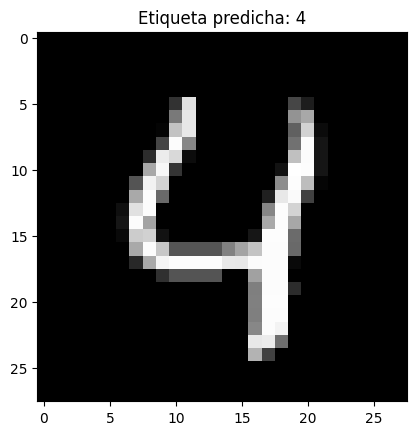

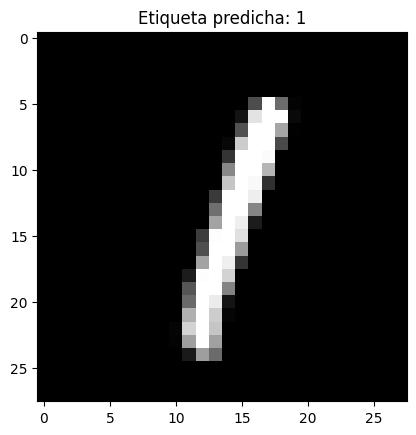

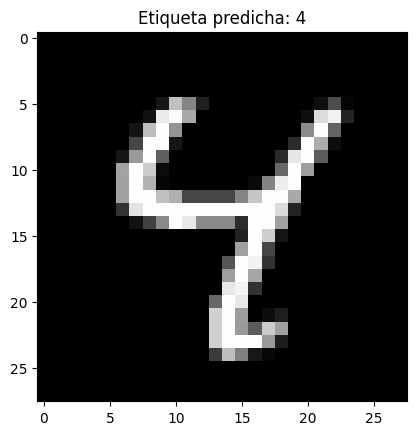

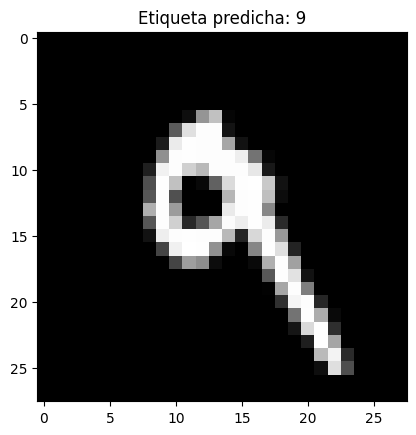

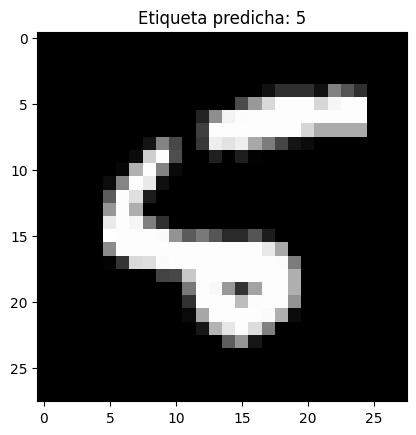

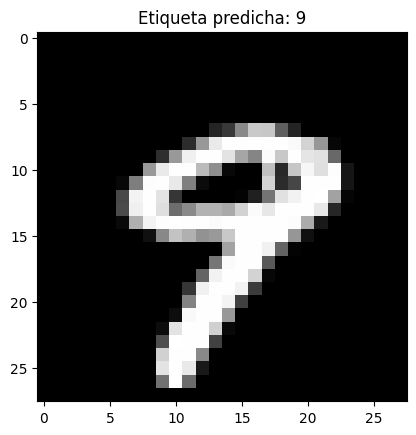

In [15]:
from keras.models import load_model

# Cargar el modelo guardado
loaded_model = load_model('mnist_model.keras')

# Hacer predicciones en los datos de prueba
predictions = loaded_model.predict(x_test)

# Obtener las etiquetas predichas
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar algunas predicciones junto con las imágenes correspondientes
for i in range(10):
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f"Etiqueta predicha: {predicted_labels[i]}")
  plt.show()

In [53]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

Evaluar Modelo

In [16]:
# Evaluar el modelo en los datos de prueba
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)

print(f"\nPrecisión en los datos de prueba: {test_acc}")

313/313 - 3s - 10ms/step - accuracy: 0.9910 - loss: 0.0256

Precisión en los datos de prueba: 0.9909999966621399


Evaluacion del modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


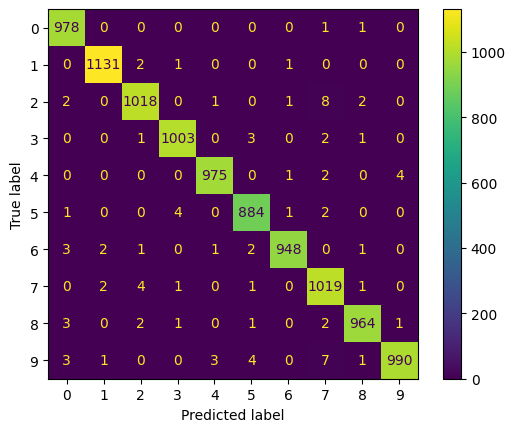

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Obtener las etiquetas verdaderas de los datos de prueba
y_true = np.argmax(y_test, axis=1)

# Obtener las etiquetas predichas por el modelo
y_pred = np.argmax(loaded_model.predict(x_test), axis=1)

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Generar y mostrar el reporte de clasificación
report = classification_report(y_true, y_pred)
print(report)


Hacer predicciones con Imagenes

In [32]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow
import imageio  # For handling GIFs

# cargo el modelo
loaded_model = load_model('mnist_model.keras')

def predecir_imagen(ruta_imagen):
  # Handle GIF images using imageio
  if ruta_imagen.lower().endswith('.gif'):
    try:
      gif = imageio.mimread(ruta_imagen)
      imagen = gif[0]  # Get the first frame
      imagen = cv2.cvtColor(imagen, cv2.COLOR_RGBA2GRAY)  # Convert to grayscale
    except Exception as e:
      print(f"Error loading GIF: {e}")
      return
  else:  # Load other image types with OpenCV
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

  # Check if image loaded successfully
  if imagen is None:
    print("Error: Could not load image. Please check the file path and format.")
    return

  # Redimensionar a 28x28
  imagen = cv2.resize(imagen, (28, 28))

  # Invertir colores si es necesario (fondo negro, dígito blanco)
  imagen = cv2.bitwise_not(imagen)

  # Normalizar los valores de los píxeles
  imagen = imagen.astype("float32") / 255.0

  # Agregar una dimensión para el canal
  imagen = np.expand_dims(imagen, axis=0)
  imagen = np.expand_dims(imagen, axis=-1)

  # Hacer la predicción
  prediccion = loaded_model.predict(imagen)
  etiqueta_predicha = np.argmax(prediccion)

  # Mostrar la imagen y la predicción
  cv2_imshow(imagen[0])
  print(f"Etiqueta predicha: {etiqueta_predicha}")





In [33]:
ruta_imagen = "/content/bambi-20clip-20art-11.gif"  # Reemplaza con la ruta de tu imagen
predecir_imagen(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Etiqueta predicha: 8


In [34]:
ruta_imagen = "/content/0.jpg"  # Reemplaza con la ruta de tu imagen
predecir_imagen(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Etiqueta predicha: 0


In [35]:
ruta_imagen = "/content/varios.jpg"  # Reemplaza con la ruta de tu imagen
predecir_imagen(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Etiqueta predicha: 2


In [49]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow
import imageio

# cargo el modelo
loaded_model = load_model('mnist_model.keras')

def predecir_imagen(ruta_imagen):
    # Cargar la imagen usando cv2.imread
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    # Verificar si la imagen se cargó correctamente
    if imagen is None:
        print(f"Error: No se pudo cargar la imagen desde {ruta_imagen}")
        return

    # Preprocesar la imagen (redimensionar y normalizar)
    imagen = cv2.resize(imagen, (28, 28))  # Ajusta el tamaño según tu modelo
    imagen = imagen / 255.0  # Normalizar a valores entre 0 y 1
    imagen = imagen.reshape(1, 28, 28, 1) # Reshape para que coincida con la entrada del modelo

    # Hacer la predicción y obtener probabilidades
    prediccion = loaded_model.predict(imagen)
    # Obtener las etiquetas con probabilidad mayor que un umbral (por ejemplo, 0.2)
    etiquetas_predichas = [i for i, prob in enumerate(prediccion[0]) if prob > 0.2]

    # Mostrar la imagen y las predicciones
    cv2_imshow(imagen[0])
    print(f"Etiquetas predichas: {etiquetas_predichas}")

    # Mostrar probabilidades de todas las etiquetas
    for i, prob in enumerate(prediccion[0]):
        print(f"Etiqueta {i}: Probabilidad = {prob:.4f}")

In [50]:
ruta_imagen = "/content/varios.jpg"  # Reemplaza con la ruta de tu imagen
predecir_imagen(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Etiquetas predichas: [4]
Etiqueta 0: Probabilidad = 0.0000
Etiqueta 1: Probabilidad = 0.0000
Etiqueta 2: Probabilidad = 0.0006
Etiqueta 3: Probabilidad = 0.0000
Etiqueta 4: Probabilidad = 0.8985
Etiqueta 5: Probabilidad = 0.0000
Etiqueta 6: Probabilidad = 0.0005
Etiqueta 7: Probabilidad = 0.0000
Etiqueta 8: Probabilidad = 0.1002
Etiqueta 9: Probabilidad = 0.0000


# **Clasificación de imágenes (CIFAR-10 data-set)**
En este Jupyter Notebook mostraremos cómo clasificar un dat-set de 60,000 imágenes para su correcta clasificación. Nos encontramos ante un claro ejemplo de clasificación, para lo cual haremos uso de una red profunda convolucional que terminará en una capa de salida densa fully-connected del tamaño del número de etiquetas del que consta nuestro data-set.

##Cargar conjunto de datos
1. El data-set que vamos a usar ocupa aproximadamente 170 MB y se descargará automáticamente desde los tutoriales de ejemplo de Keras.
2. En el CIFAR-10 data-set contamos con imágenes de 10 clases distintas: aviones, coches, pájaros, perros, gatos, cérvidos, ranas, equinos, barcos y camiones.

- [tensorflow datasets](https://www.tensorflow.org/datasets/catalog/cifar10?hl=es-419)

In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
num_train, img_rows, img_cols,  img_channels =  train_images.shape
num_train , img_rows, img_cols,  img_channels

(50000, 32, 32, 3)

In [4]:
num_test, _, _, _ =  test_images.shape
num_test, img_channels, img_rows, img_cols

(10000, 3, 32, 32)

In [5]:
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

##Mostrar imagenes del conjunto de datos



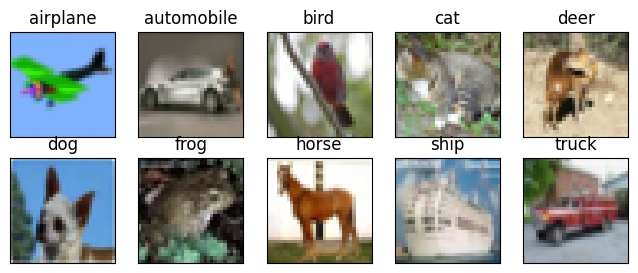

In [6]:
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels == i)[0]
    features_idx = train_images[idx]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [ ]:
# Normalizamos el train y el test data-set entre 0 y 1
train_features = train_images.astype('float32') / 255.
test_features = test_images.astype('float32') / 255.

# Convertimos las etiquetas a variables One-Hot Encoded

num_classes = len(np.unique(train_labels))

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

##Creación del modelo convolucional

In [ ]:
train_features.shape[1:]

(32, 32, 3)

In [ ]:
# Definición del modelo
# Iniciamos el modelo de manera secuencial
model = Sequential()
# Continuamos añadiendo al modelo las capas sin preocuparnos de la dimensionalidad de los inputs
# salvo en la primera capa
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                 input_shape=train_features.shape[1:]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))
# Hacemos un flattening de la última capa de Pooling
model.add(Flatten())

model.add(Dense(units=512, activation = 'relu'))

model.add(Dropout(rate=0.25))

model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_features, train_labels, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 247s 158ms/step - accuracy: 0.6290 - loss: 1.0431
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 153ms/step - accuracy: 0.6917 - loss: 0.8703
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 153ms/step - accuracy: 0.7285 - loss: 0.7662
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 153ms/step - accuracy: 0.7574 - loss: 0.6915
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 268s 157ms/step - accuracy: 0.7787 - loss: 0.6252


##Guardar el modelo entrenado

In [ ]:
model.save('cifar10_model.keras')

In [ ]:
from keras.models import load_model
loaded_model = load_model('cifar10_model.keras')

In [ ]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,752,576 (14.31 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,501,718 (9.54 MB)

In [ ]:
loaded_model.evaluate(test_features, test_labels)
predictions = loaded_model.predict(test_features)
#predict_classes = loaded_model.predict_classes(test_features)

predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.7613 - loss: 0.6799
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step


array([[5.6695886e-04, 5.1733651e-03, 5.9399419e-03, ..., 1.9263122e-03,
        7.4487287e-03, 6.1846193e-04],
       [3.5947275e-03, 3.8610199e-01, 3.1432359e-07, ..., 7.6983468e-09,
        6.1005324e-01, 2.4854043e-04],
       [2.0710558e-01, 1.5387499e-02, 5.3393519e-03, ..., 1.3818155e-03,
        7.3431253e-01, 6.8748472e-03],
       ...,
       [1.8609488e-07, 5.1474082e-08, 7.5205165e-04, ..., 6.8672784e-03,
        9.9046417e-07, 4.7796470e-07],
       [3.8697187e-02, 8.5950333e-01, 2.4262439e-03, ..., 1.4157434e-03,
        3.9290273e-04, 1.7558312e-03],
       [4.9073540e-12, 2.1309521e-13, 2.6166305e-09, ..., 9.9949735e-01,
        5.3883758e-13, 2.9143623e-12]], dtype=float32)

In [ ]:
y_test = np.argmax(test_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)



In [ ]:
print(predictions[0])
clase = np.argmax(predictions[0])
clase

##Metricas

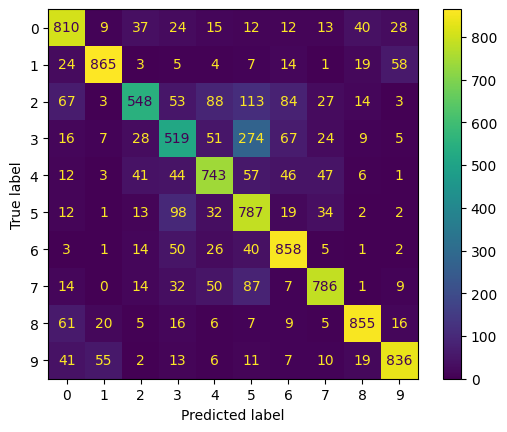

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Asume que 'y_true' son las etiquetas verdaderas y 'y_pred' son las etiquetas predichas
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Reemplaza con tus etiquetas de clase
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Asume que 'y_true' son las etiquetas verdaderas y 'y_pred' son las etiquetas predichas
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1000
           1       0.90      0.86      0.88      1000
           2       0.78      0.55      0.64      1000
           3       0.61      0.52      0.56      1000
           4       0.73      0.74      0.74      1000
           5       0.56      0.79      0.66      1000
           6       0.76      0.86      0.81      1000
           7       0.83      0.79      0.81      1000
           8       0.89      0.85      0.87      1000
           9       0.87      0.84      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



##Predicción

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def predecir(path, label):
  #Cargar imagen
  image = cv2.imread(path)

  #Redimensionar 32*32
  imagen_redimensionada = cv2.resize(image, (32, 32))

  #Mostrar imagen
  cv2_imshow(imagen_redimensionada)

  #Predecir la clase
  clase = np.argmax(loaded_model.predict(np.array([imagen_redimensionada])))
  predicted_label = class_names[clase]

  print(f"Etiqueta original: {label}")
  print(f"Etiqueta predicha: {predicted_label}")


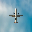

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Etiqueta original: airplane
Etiqueta predicha: airplane


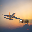

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: airplane
Etiqueta predicha: airplane


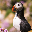

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Etiqueta original: bird
Etiqueta predicha: horse


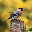

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: bird
Etiqueta predicha: airplane


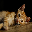

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: cat
Etiqueta predicha: horse


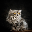

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: cat
Etiqueta predicha: horse


In [ ]:
rutas = [["/content/airplane_1.webp","airplane"],
         ["/content/airplane_2.jpg","airplane"],
         ["/content/bird_1.jpg","bird"],
         ["/content/bird_2.jpg","bird"],
         ["/content/cat_1.jpg","cat"],
         ["/content/cat_2.jpg","cat"]
]

for x in rutas:
  predecir(x[0], x[1])

Tarea

- Crear una red convolucional con el dataset MNIST
- Guardar el modelo con .save
- Hacer Prdicciones con imagenes
- Realizar metricas de evaluación